<!--######################################################################################################################################################################################################################################################################################################################################################
-->

(U5)=
# Unidad 5

## Soluciones de EDO mediante Series de Potencias

### Introducción. Sistemas Masa-Resorte con Resorte Variable

Podemos suponer que en un sistema masa-resorte modelado como [](eqMAS), a saber $mx''+kx=0$, que está en movimiento durante un largo tiempo, el resorte se debilite; es decir, varía la *constante del resorte* y ésta decae con el tiempo. En un modelo para el **resorte cada vez más viejo** la constante de resorte $k$ se reemplaza con la función decreciente $K(t)=ke^{-\alpha t}$, $k,\alpha>0$, obteniendo la ecuación diferencial lineal 

$$
mx''+ke^{-\alpha t}x=0
$$ (ResorteViejo)

También, cuando un sistema masa-resorte se somete a un ambiente en el que la temperatura disminuye con rapidez, podría tener sentido reemplazar la constante $k$ con $K(t)=kt$, $k>0$, una función que se incrementa con el tiempo ya que es razonable pensar que el frío aumenta la resistencia o endurece de los resortes. El modelo resultante se conoce como **ecuación diferencial de Airy**

$$
mx''+ktx=0
$$ (ResorteAiry)

¿Es posible resolver estas ecuaciones diferenciales? No podemos hacerlo con los métodos vistos hasta ahora.

### Soluciones Respecto a Puntos Ordinarios

Consideremos la EDO lineal de segundo orden homogénea 

$$
a_2(x)y'''+a_1(x)y'+a_0(x)y=0
$$ (Serie1)

que en forma estándar es 

$$
y''+P(x)y'+Q(x)y=0
$$ (Serie2)

**Definición**: Decimos que $x_0$ es un **punto ordinario** de [](Serie1) si tanto $P(x)$ como $Q(x)$ en la forma estándar [](Serie2) son **analíticas** en $x_0$, es decir $P(x)$ y $Q(x)$ se pueden desarrollar en serie de potencias en torno a $x_0$:

$$
P(x)=\sum_{n=0}^\infty a_n(x-x_0)^n~~~~,~~~~Q(x)=\sum_{n=0}^\infty b_n(x-x_0)^n
$$ 

Un punto que no es ordinario se denomina **punto singular** de la Ecuación Diferencial.

**Teorema**: Si $x_0$ es un punto ordinario de [](Serie1) entonces siempre es posible encontrar 2 soluciones L.I. en forma de series de potencias en torno a $x_0$. Una solución en serie converge, por lo menos, en un intervalo $]x_0-R,x_0+R[$ donde $R$ es la distancia de $x_0$ al punto singular más cercano.

```{admonition} Ejercicio Teórico
Determine los puntos ordinarios y singulares de 

$$
(x^2-x)y''-3xy'+y=0.
$$
```

**Nota**: Habitualmente analizaremos ecuaciones con $x_0=0$ como punto ordinario.

### Método de Solución Mediante Series 

Si $x_0=0$ es un punto ordinario de la ecuación [](Serie1), reemplazamos la solución 

$$
y=\sum_{n=0}^\infty c_nx^n
$$ 

en [](Serie1). Esto nos lleva a una **ecuación de recurrencia** para los coeficientes $c_n$ de la serie de potencias solución.

```{admonition} Ejercicio Teórico
Resuelva la ecuación diferencial de Airy (con $k=1$): $y''+xy=0$ en torno al punto ordinario $x_0=0$. 
```

En python podemos construir un código que calcule automáticamente la derivación y reemplazo de la serie de potencias en la ecuación diferencial y dé el desarrollo de la solución en serie de potencias, pero la relación de recurrencia entre coeficientes debe ser determinada manualmente:

In [1]:
import sympy as sp
sp.interactive.printing.init_printing(use_latex='mathjax', order='old')

x = sp.symbols('x')

def serie_EDO(N,a,b,c):
    #   N = Número de términos de la serie
    #   a = Coeficiente de y''
    #   b = Coeficiente de y'
    #   c = Coeficiente de y
    #   Observación: En caso de ingresar una fraccion numérica realizarlo de la
    #                forma: sp.Rational(p,q) donde p=numerador y q=denominador.

    '''Función que calcula N términos de la serie de potencias centrada en 0,
    asociada a la expresión ay''+by'+cy, donde a,b,c son funciones que
    dependen de x.'''

    coef = sp.symbols('c0:' + str(2 * N))
    y = sum([coef[i] * x**i for i in range(2 * N)])
    expr = sp.expand(a * sp.diff(y,x,2) + b * sp.diff(y,x) + c * y)
    co = [expr.coeff(x,i) for i in range(N)]
    serie = sum([co[i] * x**i for i in range(N)])
    return serie

serie_EDO(10,1,0,x)

                        2                 3                 4                 
2⋅c₂ + x⋅(c₀ + 6⋅c₃) + x ⋅(c₁ + 12⋅c₄) + x ⋅(c₂ + 20⋅c₅) + x ⋅(c₃ + 30⋅c₆) + x

5                 6                 7                 8                  9    
 ⋅(c₄ + 42⋅c₇) + x ⋅(c₅ + 56⋅c₈) + x ⋅(c₆ + 72⋅c₉) + x ⋅(c₇ + 90⋅c₁₀) + x ⋅(c₈

           
 + 110⋅c₁₁)

También podemos generar un código que dé el desarrollo de la serie de potencias solución:

In [2]:
import sympy as sp

# Definimos los símbolos y parámetros
x = sp.symbols('x')
sp.interactive.printing.init_printing(use_latex='mathjax', order='old')

# Función para calcular la solución en términos de solo c0 y c1
def calcular_solucion_en_terminos_de_c0_c1(N, a, b, c):
    # Definimos los coeficientes de la serie de potencias
    coef = sp.symbols('c0:' + str(2 * N))
    y = sum([coef[i] * x**i for i in range(2 * N)])
    # Expandimos la expresión de la EDO
    expr = sp.expand(a * sp.diff(y, x, 2) + b * sp.diff(y, x) + c * y)
    # Obtenemos los coeficientes de x^i
    co = [expr.coeff(x, i) for i in range(N)]
    
    # Calculamos la relación de recurrencia
    relacion_recurrencia = []
    for i in range(len(co)):
        # Resolviendo cada ecuación en función de coeficientes c_i
        eq = sp.Eq(co[i], 0)
        solucion = sp.solve(eq, coef[i + 2])  # Relación en términos de coeficientes previos
        relacion_recurrencia.append((coef[i + 2], solucion[0]) if solucion else (coef[i + 2], 0))
    
    # Expresamos los coeficientes solo en función de c0 y c1
    c0, c1 = sp.symbols('c0 c1')
    coef_valores = {coef[0]: c0, coef[1]: c1}
    for i, (ci, valor) in enumerate(relacion_recurrencia):
        if valor != 0:
            # Sustituimos cada coeficiente en términos de c0 y c1
            coef_valores[ci] = valor.subs(coef_valores)
        else:
            coef_valores[ci] = 0
    
    # Construimos la solución en términos de c0 y c1
    y_solucion = sum(coef_valores[coef[i]] * x**i for i in range(N))
    
    return relacion_recurrencia, y_solucion.simplify()

# Ejecutamos el cálculo con N=10, a=1, b=0, c=x ### Acá se introducen los parámetros
relacion_recurrencia, y_solucion = calcular_solucion_en_terminos_de_c0_c1(10, 1, 0, x) 
y_solucion

                3       4       6       7       9
            c₀⋅x    c₁⋅x    c₀⋅x    c₁⋅x    c₀⋅x 
c₀ + c₁⋅x - ───── - ───── + ───── + ───── - ─────
              6       12     180     504    12960

## Puntos Singulares Regulares. Teorema de Frobenius

**Definición**: Un punto singular $x_0$ de la EDO lineal homogénea [](Serie1) y su forma estándar [](Serie2) se denomina **regular** si las funciones 

$$
a(x)=(x-x_0)P(x)~~\text{y}~~b(x)=(x-x_0)^2Q(x)
$$ 

son analíticas en $x_0$. Un punto singular que no es regular se denomina **irregular**.

```{admonition} Ejercicio Teórico
Clasifique los puntos singulares como regulares o irregulares para la ecuación 

$$
(x^2-x)y''-3xy'+y=0.
$$
```

Para resolver la EDO [](Serie1) respecto a un punto singular regular, se emplea el siguiente teorema debido a Frobenius:

### Teorema de Frobenius

Si $x_0$ es un punto singular regular de la ecuación diferencial [](Serie1), entonces existe **al menos** una solución de la forma 

$$
y=\sum_{n=0}^\infty c_n(x-x_0)^{n+r}
$$ 

donde el número $r$ es una constante por determinar. La serie converge por lo menos en algún intervalo $0<x-x_0<R$.

```{admonition} Ejercicio Teórico
Encuentre la solución general en $]0,\infty[$ de la ecuación diferencial dada en torno al punto singular regular $x_0=0$: 

$$
2xy''-y'+2y=0.
$$
```

En python podemos construir un código que calcule automáticamente la derivación y reemplazo de la serie de potencias en la ecuación diferencial y dé el desarrollo de la solución en serie de potencias por el Teorema de Frobenius (conocidas las raíces de la ecuación indicial [](indicial)), pero la relación de recurrencia entre coeficientes debe ser determinada manualmente:

In [3]:
import sympy as sp
sp.interactive.printing.init_printing(use_latex='mathjax', order='old')

x = sp.symbols('x')

def serie_frobenius(N,a,b,c,r):

    # N = Número de términos de la serie
    # a = Coeficiente de y''
    # b = Coeficiente de y'
    # c = Coeficiente de y
    # r = Raíz indicial (evaluar por la raíz obtenida al resolver
    #     la ecuación indicial)
    # Observación: En caso de ingresar una fracción numérica realizarlo de la
    #              forma:sp.Rational(p,q) donde p=numerador y q=denominador.

    '''Función que calcula N términos de la serie de potencias centrada en 0, 
    asociada a la expresión ay''+by'+cy, donde a,b,c son funciones que 
    dependen de x, de acuerdo a solución 'y' dada por el Teorema de Frobenius.'''

    coef = sp.symbols('c0:'+str(2 * N))
    y = sum([coef[i] * x**(i + r) for i in range(2 * N)])
    expr = sp.expand(sp.cancel(sp.expand(a * sp.diff(y,x,2) + b * sp.diff(y,x) +
                                         c * y)/x**r))
    co = [expr.coeff(x,i-1) for i in range(N+1)]
    serie = x**r*(coef[0]+sum([(co[i])*x**(i) for i in range(N+1)]))
    return serie

serie_frobenius(10,2*x,-1,2,sp.Rational(3,2))

 3/2 ⎛                        2                   3                   4       
x   ⋅⎝c₀ + x⋅(2⋅c₀ + 5⋅c₁) + x ⋅(2⋅c₁ + 14⋅c₂) + x ⋅(2⋅c₂ + 27⋅c₃) + x ⋅(2⋅c₃ 

            5                   6                   7                    8    
+ 44⋅c₄) + x ⋅(2⋅c₄ + 65⋅c₅) + x ⋅(2⋅c₅ + 90⋅c₆) + x ⋅(2⋅c₆ + 119⋅c₇) + x ⋅(2⋅

                9                    10                 ⎞
c₇ + 152⋅c₈) + x ⋅(2⋅c₈ + 189⋅c₉) + x  ⋅(2⋅c₉ + 230⋅c₁₀)⎠

### Ecuación Indicial

Al resolver la ecuación 

$$
xy''+y=0
$$ 

en torno al punto singular regular $x_0=0$, encontramos una única solución: 

$$
y_1(x)=\sum_{n=0}^\infty\frac{(-1)^n}{n!(n+1)!}x^{n+1}.
$$

¿Bajo qué condiciones podemos encontrar 2 soluciones L.I.?

Si $x_0=0$ es punto singular regular de la ED [](Serie1) entonces las funciones 

$$
a(x)=xP(x)~~\text{y}~~b(x)=x^2Q(x)
$$ 

son analíticas en torno a $x_0=0$, es decir 

$$
\begin{array}{ccc}
     a(x)=xP(x)&=&a_0+a_1x+a_2x^2+a_3x^3+\cdots  \\
     b(x)=x^2Q(x)&=&b_0+b_1x+b_2x^2+b_3x^3+\cdots
\end{array}
$$

Sustituyendo la solución $\displaystyle y=\sum_{n=0}^\infty c_nx^{n+r}$ en 

$$
x^2y''+x\left[xP(x)\right]y'+\left[x^2Q(x)\right]y=0
$$ 

(luego de multiplicar la EDO en forma estándar por $x^2$)

obtenemos la **ecuación indicial** 

$$
r(r-1)+a_0r+b_0=0
$$ (indicial)

Esta es una ecuación cuadrática en $r$, por lo que tenemos 3 casos en función de sus raíces $r_1$ y $r_2$ (solo consideramos el caso en que son reales):

1. Si $r_1$ y $r_2$ son distintas y la diferencia $r_1-r_2$ no es un entero positivo, entonces existen dos soluciones L.I. de la ecuación [](Serie1) de la forma

$$
y_1(x)=\sum_{n=0}^\infty c_nx^{n+r_1}~~,~~y_2(x)=\sum_{n=0}^\infty b_nx^{n+r_2}~~,~~b_0,c_0\neq0.
$$

2. Si $r_1$ y $r_2$ son distintas y la diferencia $r_1-r_2$ es un entero positivo, entonces existen dos soluciones de la ecuación [](Serie1) L.I. de la forma

$$
\begin{array}{ccc}
       &y_1(x)=\displaystyle\sum_{n=0}^\infty c_nx^{n+r_1}~~,&c_0\neq0 \\
        &y_2(x)=\displaystyle Cy_1(x)\ln(x)+\sum_{n=0}^\infty b_nx^{n+r_2}~~,&b_0\neq0
    \end{array}
$$ 

donde $C$ es una constante que podría ser cero.

3. Si $r_1$ y $r_2$ son iguales, entonces existen dos soluciones L.I. de la ecuación [](Serie1) de la forma 
    
$$
\begin{array}{ccc}
       &&y_1(x)=\displaystyle\sum_{n=0}^\infty c_nx^{n+r_1}~~,~~c_0\neq0 \\
        &&y_2(x)=\displaystyle y_1(x)\ln(x)+\sum_{n=1}^\infty b_nx^{n+r_1}
    \end{array}
$$

```{admonition} Ejercicio Teórico
Encuentre la forma de la solución general en $]0,\infty[$ de la ecuación 

$$
xy''+(1-x)y'-y=0
$$
```

## Ecuación de Bessel

La ecuación diferencial 

$$
x^2y''+xy'+(x^2-\nu^2)y=0
$$ (Bessel)

se denomina **ecuación diferencial de Bessel** de **orden** $\mathbf{\nu}$, con $\nu\geq0.$

El punto $x=0$ es un punto singular regular de la ecuación de Bessel, cuya ecuación indicial es 

$$
r(r-1)+r-\nu^2=0~~\Rightarrow~~r=\pm\nu.
$$

Si se reemplaza la solución $\displaystyle y=\sum_{n=0}^\infty c_nx^{n+r}$ y sus derivadas en la ecuación de Bessel [](Bessel), y luego se simplifica, obtenemos que 

$$
c_1=c_3=c_5=\cdots=c_{2n+1}=0~~,~~n\geq0
$$ 

$$
c_{2n}=\frac{(-1)^n}{2^{2n+\nu}\cdot n!\cdot\Gamma(1+\nu+n)}~~,~~n\geq0
$$ 

donde $\Gamma(t)$ es la función [**Gamma**](https://en.wikipedia.org/wiki/Gamma_function) 

$$
\Gamma(t)=\int_0^\infty x^{t-1}e^{-x}~dx.
$$

### Funciones de Bessel de Primera Clase

Usamos los $c_{2n}$ recién obtenidos y $r=\nu$. Una solución de la ecuación de Bessel es 

$$
J_\nu(x)=\sum_{n=0}^\infty\frac{(-1)^n}{n!\cdot\Gamma(1+\nu+n)}\left(\frac{x}{2}\right)^{2n+\nu}
$$ 

y la otra es 

$$
J_{-\nu}(x)=\sum_{n=0}^\infty\frac{(-1)^n}{n!\cdot\Gamma(1-\nu+n)}\left(\frac{x}{2}\right)^{2n-\nu}.
$$ 

Luego, la solución general de la ecuación de Bessel en $]0,\infty[$ es 

$$
y(x)=c_1J_\nu(x)+c_2J_{-\nu}(x)~~,~~\nu\not\in\mathbb{Z}
$$

Gráficamente, en Python:

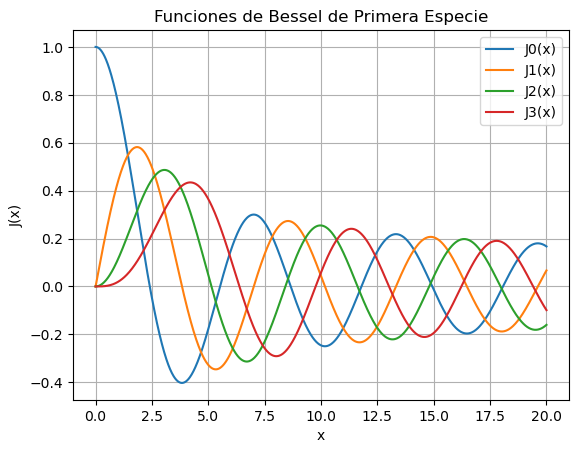

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv

# Definir valores de x para el gráfico
x = np.linspace(0, 20, 1000)

# Una lista de funciones de Bessel de 1ra especie
y = [jv(n, x) for n in range(4)]

# Gráfico
for i, yi in enumerate(y):
    plt.plot(x, yi, label='J{}(x)'.format(i))
plt.xlabel('x')
plt.ylabel('J(x)')
plt.title('Funciones de Bessel de Primera Especie')
plt.legend()
plt.grid(True)
plt.show()

### Funciones de Bessel de Segunda Clase 

La función definida por 

$$
Y_\nu(x)=\frac{\cos(\nu\pi)J_\nu(x)-J_{-\nu}(x)}{\sin(\nu\pi)}
$$ 

es L.I. con $J_\nu(x)$ y tiene la propiedad de que 

$$
Y_m(x)=\lim_{\nu\to m} Y_\nu(x)
$$ 

existe cuando $\nu\to m$ (con $m\in\mathbb{Z}$) y es L.I. con $J_m(x)$. Luego, la solución general de la ecuación de Bessel en $]0,\infty[$ es 

$$
y(x)=c_1J_\nu(x)+c_2Y_{\nu}(x)
$$ 

para todo valor de $\nu$.

Gráficamente, en Python:

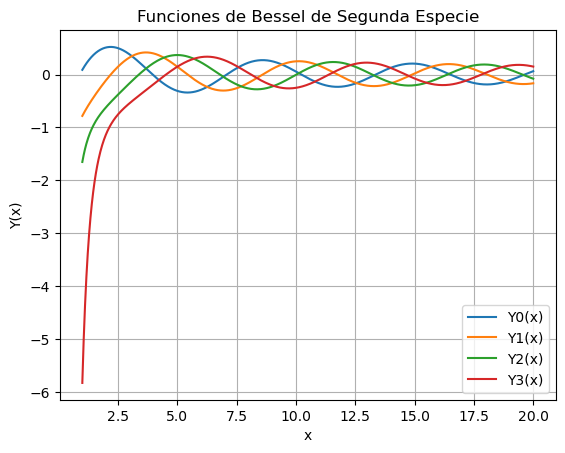

In [5]:
from scipy.special import yn

# Se puede cambiar yn por yv para órdenes fraccionarios
# al importar yv  

# Definir valores de x para el gráfico
x = np.linspace(1, 20, 1000)

# Una lista de funciones de Bessel de 2da especie
y = [yn(n, x) for n in range(4)]

# Gráfico
for i, yi in enumerate(y):
    plt.plot(x, yi, label='Y{}(x)'.format(i))
plt.xlabel('x')
plt.ylabel('Y(x)')
plt.title('Funciones de Bessel de Segunda Especie')
plt.legend()
plt.grid(True)
plt.show()

### Ecuación Paramétrica de Bessel 

La ecuación diferencial 

$$
x^2y''+xy'+(\alpha^2x^2-\nu^2)y=0
$$ 

se denomina **ecuación paramétrica de Bessel** y puede ser resuelta mediante el cambio de variable $t=\alpha x$. Su solución general es 

$$
y(x)=c_1J_\nu(\alpha x)+c_2Y_\nu(\alpha x).
$$

```{admonition} Ejercicio Teórico
Sean $c,n$ constantes positivas y considere la ecuación diferencial 

$$
y''(x)+cx^ny(x) = 0, \quad \textrm{para $x>0.$}
$$ (ejer2)

Demuestre que realizando primero la sustitución $y=x^{1/2}z$ y luego realizando la sustitución $w=\dfrac{2\sqrt{c}}{n+2}x^{n/2+1}$, entonces la ecuación [](ejer2) se transforma en la ecuación de Bessel 

$$
w^2\dfrac{d^2z}{dw^2}+w\dfrac{dz}{dw}+\left(w^2-\dfrac{1}{(n+2)^2}\right)z=0.
$$

Determine finalmente la solución para $y(x)$.
```

```{admonition} Ejercicio Aplicado
Determine la solución de la ecuación diferencial de Airy: $y''+\alpha^2 x y=0,\quad x>0$.
```